In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
iris_df = iris_df[iris_df['target'] != 0][['sepal length (cm)', 'sepal width (cm)', 'target']]

In [19]:
iris_df.head()

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


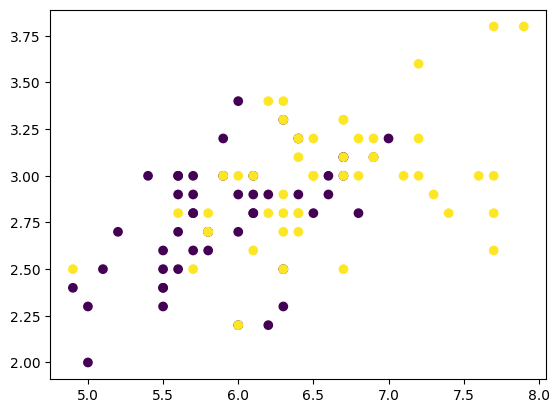

In [21]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])

In [23]:
df_train = iris_df.sample(10)
df_train

,sepal length (cm),sepal width (cm),target
110,6.5,3.2,2
59,5.2,2.7,1
87,6.3,2.3,1
140,6.7,3.1,2
130,7.4,2.8,2
64,5.6,2.9,1
80,5.5,2.4,1
96,5.7,2.9,1
144,6.7,3.3,2
70,5.9,3.2,1


In [24]:
df = iris_df.sample(100)
df_train = df.iloc[:60,:].sample(10) # 60% of the data
df_test = df.iloc[60:80,:].sample(10) # 20% of the data
df_val = df.iloc[80:,:].sample(10) # 20% of the data

In [25]:
df_train

,sepal length (cm),sepal width (cm),target
82,5.8,2.7,1
88,5.6,3.0,1
136,6.3,3.4,2
126,6.2,2.8,2
96,5.7,2.9,1
101,5.8,2.7,2
97,6.2,2.9,1
52,6.9,3.1,1
74,6.4,2.9,1
119,6.0,2.2,2


In [26]:
df_val

,sepal length (cm),sepal width (cm),target
70,5.9,3.2,1
141,6.9,3.1,2
133,6.3,2.8,2
65,6.7,3.1,1
132,6.4,2.8,2
145,6.7,3.0,2
102,7.1,3.0,2
125,7.2,3.2,2
87,6.3,2.3,1
91,6.1,3.0,1


In [27]:
df_test

,sepal length (cm),sepal width (cm),target
105,7.6,3.0,2
121,5.6,2.8,2
98,5.1,2.5,1
124,6.7,3.3,2
72,6.3,2.5,1
108,6.7,2.5,2
116,6.5,3.0,2
71,6.1,2.8,1
146,6.3,2.5,2
110,6.5,3.2,2


In [32]:
X_test = df_val.iloc[:,0:2].values  # sepal length and sepal width
y_test = df_val.iloc[:, -1].values # target

In [33]:
y_test

array([1, 2, 2, 1, 2, 2, 2, 2, 1, 1])

### Bagging

In [82]:
df_bag = df_train.sample(5, replace=False) # 5 samples with replacement

X = df_bag.iloc[:,0:2].values  # sepal length and sepal width
y = df_bag.iloc[:, -1].values # target

In [83]:
df_bag

,sepal length (cm),sepal width (cm),target
101,5.8,2.7,2
136,6.3,3.4,2
96,5.7,2.9,1
74,6.4,2.9,1
52,6.9,3.1,1


In [84]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [85]:
dt_bag1 = DecisionTreeClassifier()


In [86]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [87]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=False)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal length (cm),sepal width (cm),target
101,5.8,2.7,2
74,6.4,2.9,1
97,6.2,2.9,1
52,6.9,3.1,1
96,5.7,2.9,1
88,5.6,3.0,1
82,5.8,2.7,1
119,6.0,2.2,2


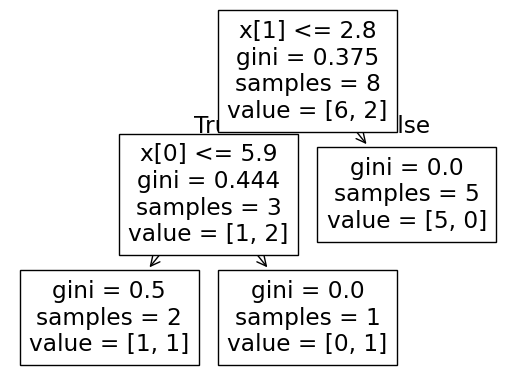

0.5


C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


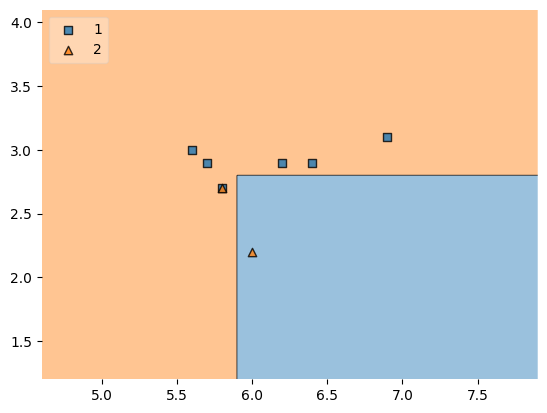

In [88]:

evaluate(dt_bag1,X,y)

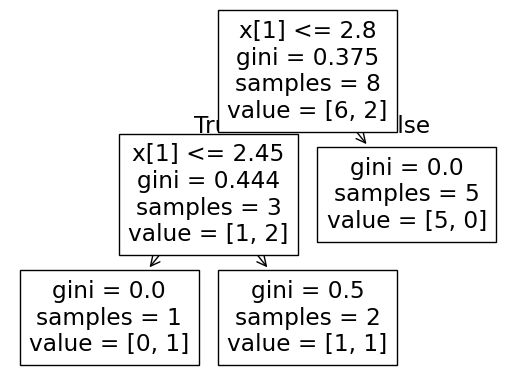

0.3


C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


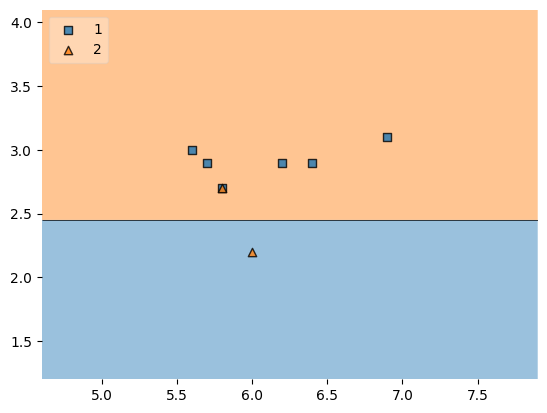

In [89]:

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [90]:
df_test

,sepal length (cm),sepal width (cm),target
105,7.6,3.0,2
121,5.6,2.8,2
98,5.1,2.5,1
124,6.7,3.3,2
72,6.3,2.5,1
108,6.7,2.5,2
116,6.5,3.0,2
71,6.1,2.8,1
146,6.3,2.5,2
110,6.5,3.2,2


In [91]:
print("Predictions for Tree 1", dt_bag1.predict(np.array([7.0, 3.2]).reshape(1,2)))
print("Predictions for Tree 2", dt_bag2.predict(np.array([2.9, 4.2]).reshape(1,2)))


Predictions for Tree 1 [1]
Predictions for Tree 2 [1]


C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
